In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from model import Model 

from utils import viz_samples
from config import Config
from noise_scheduler import NoiseScheduler

In [2]:
cfg = Config()
log_dir = cfg.log_dir
ns = NoiseScheduler(cfg)
model = Model(cfg).cuda()
model.load_state_dict(torch.load(cfg.log_dir + "params.pt"))
model.eval()

Model(
  (model): MLP(
    (model): Sequential(
      (0): Linear(in_features=3, out_features=64, bias=True)
      (1): GELU(approximate='none')
      (2): Linear(in_features=64, out_features=64, bias=True)
      (3): GELU(approximate='none')
      (4): Linear(in_features=64, out_features=64, bias=True)
      (5): GELU(approximate='none')
      (6): Linear(in_features=64, out_features=64, bias=True)
      (7): GELU(approximate='none')
      (8): Linear(in_features=64, out_features=2, bias=True)
    )
  )
)

In [3]:
'''
Run inference
'''
n = 1000
x_last = torch.randn(n, 2).cuda()
samples = [x_last]

for t in reversed(range(ns.num_timesteps)):
    with torch.no_grad():
        x_t = samples[-1]
        eps_pred = model(x_t, t)
        # reconstruct image here
        x_old = ns.remove_noise(x_t, t, eps_pred)
    # add to samples
    samples.append(x_old)

In [4]:
samples[0].shape

torch.Size([1000, 2])

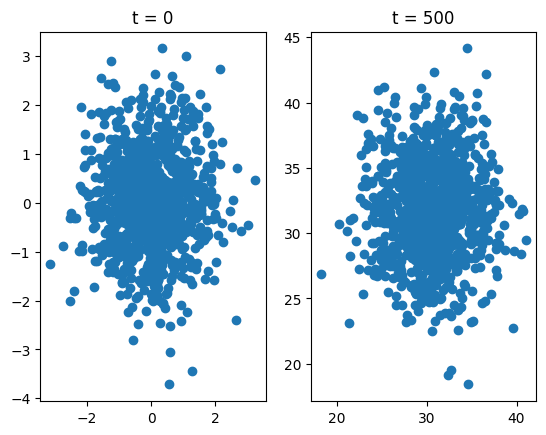

In [5]:
x_0 = samples[0][:, 0].cpu()
y_0 = samples[0][:, 1].cpu()

offset = 0
x_t = samples[ns.num_timesteps-offset][:, 0].cpu()
y_t = samples[ns.num_timesteps-offset][:, 1].cpu()

plt.figure()
plt.subplot(1,2,1)
plt.title("t = {}".format(0))
plt.scatter(x_0, y_0)
plt.subplot(1,2,2)
plt.title("t = {}".format(ns.num_timesteps))
plt.scatter(x_t, y_t)